In [4]:
import pandas as pd
import numpy as np

np.set_printoptions(linewidth=120)

In [5]:
import sys
from pathlib import Path
import os

sys.path.append( (Path(os.getcwd()).parent).as_posix() )

In [6]:
data = pd.read_csv('./data/Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Data cleaning

In [7]:
data.dropna(subset=['Price', 'Longtitude', 'Lattitude'], axis=0, inplace=True)

# Features that do not affect the price
data.drop(['Method', 'Date', 'SellerG', 'Postcode'], axis=1, inplace=True)

# Features that had 2/3 of missing data. Data filling methods at this point are useless
data.drop(['YearBuilt', 'BuildingArea'], axis=1, inplace=True)

data.reset_index(inplace=True, drop=True)
data

,Suburb,Address,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20988,Yarraville,78 Bayview Rd,3,h,1101000.0,6.3,3.0,1.0,NaN,288.0,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
20989,Yarraville,13 Burns St,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
20990,Yarraville,29A Murray St,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
20991,Yarraville,147A Severn St,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [8]:
geo_features = ['Longtitude', 'Lattitude', 'CouncilArea', 'Address', 'Suburb']
position_data = data[geo_features]
data.drop(geo_features, axis=1, inplace=True)

In [9]:
cat_feat = [f for f in data.columns if data.dtypes[f] == 'object']
num_feat = [f for f in data.columns if f not in cat_feat]

for f in cat_feat:
    data[f] = data[f].fillna(method='ffill')
    
for f in num_feat:
    data[f] = data[f].fillna(data[f].median())

/tmp/u/kopyla/ipykernel_20747/1293034053.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f] = data[f].fillna(method='ffill')


In [10]:
data.isna().sum(axis=0)

Rooms            0
Type             0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Regionname       0
Propertycount    0
dtype: int64

## Data preprocessing

- standardization (for numerical features)
- OHE (for categorical)
- separate spatial data from the rest

In [11]:
from scipy import stats

data = data[(np.abs(stats.zscore(data[num_feat])) <= 3).all(axis=1)]

target = data["Price"].to_numpy().reshape(-1, 1)
data.drop(columns=["Price"], inplace=True)
num_feat.remove("Price")

/tmp/u/kopyla/ipykernel_20747/3330138500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Price"], inplace=True)


In [12]:
print(geo_features)
position_data = position_data.iloc[data.index].reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

['Longtitude', 'Lattitude', 'CouncilArea', 'Address', 'Suburb']


In [13]:
cat_data = data[cat_feat]
num_data = data[num_feat]

In [14]:
from sklearn.preprocessing import StandardScaler, Normalizer

std_scaler = StandardScaler()
norm = Normalizer()

num_data = std_scaler.fit_transform(num_data)
num_data.shape

(19267, 7)

One-hot encoding is applied to categorical features "Regionname" and "Type"

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
encoded_cat_data = ohe.fit_transform(data[cat_feat])
encoded_cat_data = pd.DataFrame(encoded_cat_data.todense())

data = np.hstack((num_data, encoded_cat_data))

In [16]:
position_data = position_data[['Longtitude', 'Lattitude']].to_numpy()

In [17]:
print("Num ", num_data.shape)
print("Cat ", encoded_cat_data.shape)
print("Data ", data.shape)
print("Pos ", position_data.shape)
print("Target ", target.shape)

Num  (19267, 7)
Cat  (19267, 11)
Data  (19267, 18)
Pos  (19267, 2)
Target  (19267, 1)


## Encoding to graph

In [18]:
from math import radians, cos, sin, asin, sqrt

# Formula for Haversine distance

R = 6371

def get_geodist(loc_a: np.ndarray, loc_b: np.ndarray) -> float:
    lon_1, lat_1 = radians(loc_a[0]), radians(loc_a[1])
    lon_2, lat_2 = radians(loc_b[0]), radians(loc_b[1])

    dlon = lon_2 - lon_1
    dlat = lat_2 - lat_1
    a = sin(dlat / 2)**2 + cos(lat_1) * cos(lat_2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))

    return c * R

Here the new _Representative Encoder_ is applied to the concatenation of spatial data that we have and our target (regression) feature.
It uses the following algorithm:

1) Rescale both target and spatial data, if needed.
2) Apply KMenas clusterization, for pre-defined N_CLULSTERS.
3) Derive cluster encodings.
4) Cut off _target_ dimension and use spatial subset of the encodings only.
5) Create edge_index for graph construction:
    - for each datapoint find the closest cluster center
    - add directed edge going from this cluster center to the current vertex

In [19]:
"""
This file contains implementation of Representative Encoding - edge creation mechanism, based on
spatial clusters representatives.
"""

from typing import Callable
from pathlib import Path

import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator,TransformerMixin


# TODO: styling
# TODO: docstring
class ReprEncoder:
    _scaler: TransformerMixin = StandardScaler()
    _kmeans: BaseEstimator = KMeans(
        max_iter=100_000,
        init="k-means++",
        random_state=13,
    )


    def __init__(
        self,
        n_repr: int = 100,
        dist_metric: Callable = get_geodist,
        neigh_rate: float = 1,
        *,
        cache_dir: Path
    ):

        self._kmeans.set_params(n_clusters=n_repr)
        self.n_repr = n_repr
        self.dist_metric = dist_metric
        self.neigh_rate = neigh_rate


    # NOTE: data matrix contains "target values" as the LAST COLUMN
    # TODO: decompose?
    def __call__(self, data: np.ndarray, scale: bool = False, *, cache: bool = False) -> torch.Tensor:
        if scale:
            data = self._scaler.fit_transform(data)

        self._kmeans.fit(data)
        repr = self._kmeans.cluster_centers_

        print(f"Inter-group variance of target after KMeans: {repr[:, -1].var()}")
        repr = repr[:, :-1]
        winners = np.asarray([
            np.argmin([self.dist_metric(r, x) for r in iter(repr)])
            for x in iter(data[:, :-1])
        ])

        # TODO: Separate data by winner and report intra-group variance

        edge_index = torch.tensor(
            [
                [ cluster_repr, self.n_repr + entry_idx ]
                for entry_idx, cluster_repr in enumerate(winners)
            ],
            dtype=torch.long
        ).T
        if cache:
            self.serialize(edge_index)

        return edge_index, winners


In [20]:
from importlib import reload

N_CLUSTERS = 50
encoder = ReprEncoder(N_CLUSTERS, get_geodist, neigh_rate=0.5, cache_dir=Path("cache") )

In [22]:
edge_idx, assigned_clusters = encoder(np.hstack((position_data, target)), scale=True)

Inter-group variance of target after KMeans: 1.230827182154351


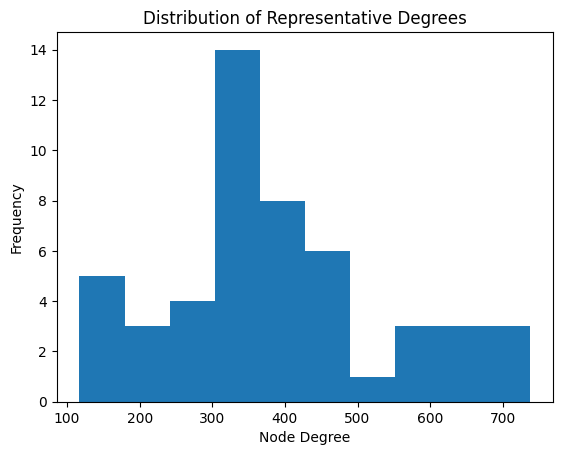

In [23]:
import torch_geometric.utils as utils
import matplotlib.pyplot as plt

degrees = utils.degree(edge_idx[0])
plt.hist(degrees)
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Distribution of Representative Degrees')
plt.show()

## GNN

`GNN Architecture`:
- SAGEConv (128)
- SAGEConv (128)
- Dense (128) + dropout
- Dense (128) + dropout
- Dense (128) + dropout

In [25]:
import torch
import torch.nn as nn
import torch_geometric.nn as nn_geom
from torch_geometric.data import Data

class Net(nn.Module):
    def __init__(self, input_size: int, hidden_layer: int):
        super().__init__()
        # self.conv1 = nn_geom.SAGEConv(input_size, hidden_layer, project=True)
        # self.conv2 = nn_geom.SAGEConv(hidden_layer, hidden_layer, project=True)
        
        self.dropout = nn.Dropout(p=0.3)

        self.linear1 = nn.Linear(input_size, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, hidden_layer)
        self.linear3 = nn.Linear(hidden_layer, hidden_layer)
        self.linear4 = nn.Linear(hidden_layer, 1)

    
    def forward(self, data: Data, edge_index: torch.Tensor) -> torch.Tensor:
        # x = self.conv1(data, edge_index).relu()
        # x = self.conv2(x, edge_index).relu()

        x = self.linear1(data).relu()
        x = self.dropout(x) 
        x = self.linear2(x).relu()
        x = self.dropout(x) 
        x = self.linear3(x).relu()
        x = self.dropout(x) 

        return self.linear4(x)

In [27]:
import warnings

from sklearn.metrics import r2_score
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader


warnings.filterwarnings(action='ignore')

N_EPOCHS = 200
loss_criteria = nn.MSELoss()
def gnn_model(graph: Data, data_loader: DataLoader) -> nn.Module:
    model = Net(graph.x.shape[1], 128)
    optim = torch.optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(N_EPOCHS):
        model.train()
        for batch in data_loader:
            optim.zero_grad()
            out = model(batch.x, batch.edge_index)

            y = batch.y[:batch.batch_size] 
            out = out[:batch.batch_size]
            loss = loss_criteria(out, y)

            loss.backward()
            optim.step()

        model.eval()
        with torch.no_grad():
            predicts = model(graph.x, graph.edge_index)
            mse = loss_criteria(predicts[graph.val_mask], graph.y[graph.val_mask])
            r2 = r2_score(graph.y[graph.val_mask].detach(), predicts[graph.val_mask].detach())    
            print(f'Epoch #{epoch} | Loss = {mse:.4e} | R^2 = {r2}')

    return model

In [28]:
def evaluate_net(model: nn.Module, graph: Data, name: str):
    model.eval()

    predicts = model(graph.x, graph.edge_index).detach()
    actual = graph.y

    mse = loss_criteria(predicts[graph.test_mask], actual[graph.test_mask])
    r2 = r2_score(actual[graph.test_mask].detach(), predicts[graph.test_mask].detach())

    print(f'{name} : MSE_Loss = {mse:.4e} | R^2 = {r2}')

    plt.title("Regression plot | 256 batch | 128 CONV | [1]")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.scatter(actual, predicts)
    plt.plot(actual, actual, 'r-', s=5)

    return predicts

## Insetring cluster-representatives

### `Approach HOMO`: 

- find clusters
- insert representatives into the graph as "dumb vertices"
    - not used for training/inferrence
- set up representative's embedding as averaged features of assigned nodes

In [29]:
entry_clustering = [
    data[assigned_clusters == cls, :]
    for cls in range(N_CLUSTERS)
]

repr_data = np.asarray([
    np.mean(cluster_points,axis=0)
    for cluster_points in entry_clustering
])

data_extended = np.vstack((repr_data, data))
target_extended = np.vstack((np.full((N_CLUSTERS, 1), np.nan), target))

In [58]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
from torch_geometric.transforms import RandomNodeSplit

g_data = Data(
    torch.tensor(data_extended, dtype=torch.float32),
    edge_index=edge_idx.contiguous(),
    y=torch.tensor(target_extended, dtype=torch.float32),
)

node_splitter = RandomNodeSplit(num_val=0.2, num_test=0.1)
graph = node_splitter(g_data)

In [59]:
print(
    graph.train_mask[:N_CLUSTERS].sum(),
    graph.test_mask[:N_CLUSTERS].sum(),
    graph.val_mask[:N_CLUSTERS].sum(),
)

tensor(41) tensor(1) tensor(8)


In [60]:
# NOTE: excluding representative nodes from train/test/val subsets

exclude_mask = np.full(graph.x.shape[0], True)
exclude_mask[:N_CLUSTERS] = False

graph.train_mask = (graph.train_mask & exclude_mask).to(dtype=torch.bool)
graph.test_mask = (graph.test_mask & exclude_mask).to(dtype=torch.bool)
graph.val_mask = (graph.val_mask & exclude_mask).to(dtype=torch.bool)

In [61]:
print(
    graph.train_mask[:N_CLUSTERS].sum(),
    graph.test_mask[:N_CLUSTERS].sum(),
    graph.val_mask[:N_CLUSTERS].sum(),
)

tensor(0) tensor(0) tensor(0)


In [62]:
data_loader = NeighborLoader(graph,
                             input_nodes=graph.train_mask,
                             batch_size=256,
                             num_neighbors=[10],
                             shuffle=True,
                            )

In [63]:
model = gnn_model(graph, data_loader)

Epoch #0 | Loss = 1.3683e+12 | R^2 = -3.94588547195106
Epoch #1 | Loss = 1.3601e+12 | R^2 = -3.9161580096436097
Epoch #2 | Loss = 1.3049e+12 | R^2 = -3.7167166389770925
Epoch #3 | Loss = 1.1226e+12 | R^2 = -3.058003949773159
Epoch #4 | Loss = 7.6713e+11 | R^2 = -1.7729292041823883
Epoch #5 | Loss = 3.8999e+11 | R^2 = -0.4096966863884006
Epoch #6 | Loss = 2.2768e+11 | R^2 = 0.17702554947517968
Epoch #7 | Loss = 1.8857e+11 | R^2 = 0.3183949013195253
Epoch #8 | Loss = 1.6999e+11 | R^2 = 0.38553915762211566
Epoch #9 | Loss = 1.5644e+11 | R^2 = 0.4345284868547453
Epoch #10 | Loss = 1.4505e+11 | R^2 = 0.4756814757588519
Epoch #11 | Loss = 1.3599e+11 | R^2 = 0.5084226342462205
Epoch #12 | Loss = 1.2854e+11 | R^2 = 0.5353630818598294
Epoch #13 | Loss = 1.2224e+11 | R^2 = 0.5581395046936435
Epoch #14 | Loss = 1.1736e+11 | R^2 = 0.5757983495607027
Epoch #15 | Loss = 1.1365e+11 | R^2 = 0.5891939073501515
Epoch #16 | Loss = 1.1053e+11 | R^2 = 0.6004705354142109
Epoch #17 | Loss = 1.0822e+11 | R^2 

KeyboardInterrupt: 

GNN_REPR (aggregation) : MSE_Loss = 8.5785e+10 | R^2 = 0.6954308525374531


AttributeError: Line2D.set() got an unexpected keyword argument 's'

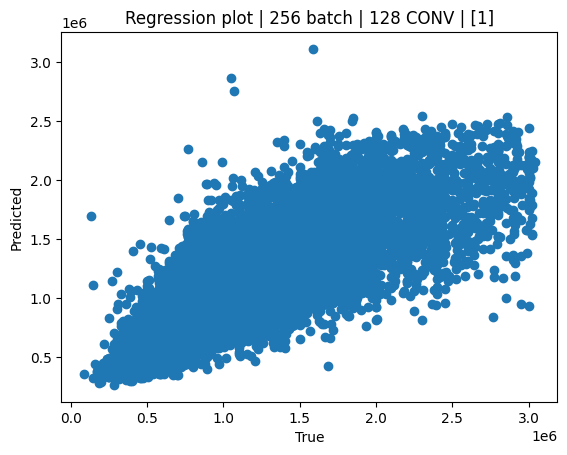

In [ ]:
evaluate_net(model, graph, "GNN_REPR (aggregation)")

`The graph below is the performance of GNN with random edges based on "Threshold Method".`

__GNN : MSE_Loss = 7.7954e+10 | R^2 = 0.711570577320018__

![image.png](../plots/gnn_no_spatial.png)

### `Approach HETERO`: 
- find clusters 
- extend to _Heterogeneous_ graph, adding "Bonus Representatives"

In [ ]:
target_clustering = [
    target[assigned_clusters == cls, :]
    for cls in range(N_CLUSTERS)
]

repr_data = np.asarray([
    np.mean(cluster_points)
    for cluster_points in target_clustering
]).reshape(-1, 1)

bonuses = np.asarray(
    [
        repr_data[cls]
        for cls in assigned_clusters
    ]
)

# np.hstack((
#     np.zeros((N_CLUSTERS, data.shape[1])),
#     np.asarray([
#         np.mean(cluster_points)
#         for cluster_points in target_clustering
#     ]).reshape(-1, 1)
# ))

# data = np.hstack((data, np.zeros((data.shape[0], 1))))
data = np.hstack((data, std_scaler.fit_transform(bonuses)))

In [ ]:
data

array([[-1.12600091, -1.38424728, -1.12399884, ...,  0.        ,  0.        ,  0.16312587],
       [-1.12600091, -1.38424728, -1.12399884, ...,  0.        ,  0.        ,  0.16312587],
       [ 0.00581563, -1.38424728,  0.01753749, ...,  0.        ,  0.        ,  0.16312587],
       ...,
       [-1.12600091, -0.75878721, -1.12399884, ...,  1.        ,  0.        ,  0.23889046],
       [-1.12600091, -0.75878721, -1.12399884, ...,  1.        ,  0.        ,  0.23889046],
       [-1.12600091, -0.75878721, -1.12399884, ...,  1.        ,  0.        ,  0.23889046]])

In [ ]:
# data_extended = np.vstack((repr_data, data))
# target_extended = np.vstack((np.full((N_CLUSTERS, 1), np.nan), target))

data_extended = data
target_extended = target

In [ ]:
g_data = Data(
    torch.tensor(data_extended, dtype=torch.float32),
    edge_index=edge_idx,
    y=torch.tensor(target_extended, dtype=torch.float32)
)

node_splitter = RandomNodeSplit(num_val=0.2, num_test=0.1)
graph = node_splitter(g_data)

In [ ]:
edge_idx[1, :] -= N_CLUSTERS

data_loader = NeighborLoader(graph,
                             input_nodes=graph.train_mask,
                             batch_size=256,
                             num_neighbors=[10],
                             shuffle=True,
                            )

In [ ]:
model = gnn_model(graph, data_loader)

Epoch #0 | Loss = 1.3411e+12 | R^2 = -4.091202671361319
Epoch #1 | Loss = 1.3327e+12 | R^2 = -4.059068837723136
Epoch #2 | Loss = 1.2760e+12 | R^2 = -3.843850467247446
Epoch #3 | Loss = 1.0879e+12 | R^2 = -3.1299064819375637
Epoch #4 | Loss = 7.1761e+11 | R^2 = -1.7241905729872449
Epoch #5 | Loss = 3.2538e+11 | R^2 = -0.23521090095020747
Epoch #6 | Loss = 1.6134e+11 | R^2 = 0.3875116932392967
Epoch #7 | Loss = 1.2804e+11 | R^2 = 0.5139474424787812
Epoch #8 | Loss = 1.1505e+11 | R^2 = 0.5632681247021798
Epoch #9 | Loss = 1.0643e+11 | R^2 = 0.5959574744990703
Epoch #10 | Loss = 1.0044e+11 | R^2 = 0.6187008178376684
Epoch #11 | Loss = 9.5311e+10 | R^2 = 0.6381840823730613
Epoch #12 | Loss = 9.1234e+10 | R^2 = 0.6536605498076602
Epoch #13 | Loss = 8.8229e+10 | R^2 = 0.6650667637861445
Epoch #14 | Loss = 8.5654e+10 | R^2 = 0.6748437826422953
Epoch #15 | Loss = 8.3749e+10 | R^2 = 0.6820756999079292
Epoch #16 | Loss = 8.1905e+10 | R^2 = 0.6890733399407927
Epoch #17 | Loss = 8.0584e+10 | R^2 =

GNN_REPR (bonus) : MSE_Loss = 7.8179e+10 | R^2 = 0.7244855440027664


tensor([[1108127.7500],
        [1070915.3750],
        [1389954.6250],
        ...,
        [1003546.1250],
        [ 674070.1250],
        [ 900205.1250]])

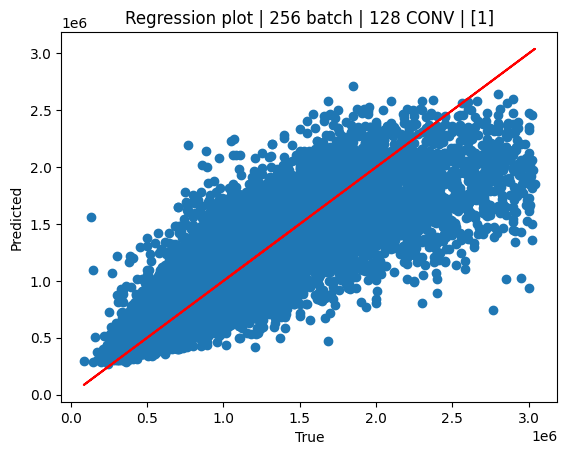

In [ ]:
evaluate_net(model, graph, "GNN_REPR (bonus)")

`The graph below is the performance of NN with no convolution and Dense layers only.`

__GNN : MSE_Loss = 8.3118e+10 | R^2 = 0.6759202881710009__

![image.png](../plots/mlp_no_spatial.png)

In [ ]:
# from torch_geometric.data import HeteroData

# loss_criteria = nn.MSELoss()
# def gnn_model_hetero(graph: HeteroData, data_loader: DataLoader, base_type: str) -> nn.Module:
#     model = nn_geom.to_hetero(
#         Net(graph[base_type].x.shape[1], 128),
#         graph.metadata(),
#     )
#     optim = torch.optim.Adam(model.parameters(), lr=5e-3)

#     for epoch in range(N_EPOCHS):
#         model.train()
#         for batch in data_loader:
#             optim.zero_grad()
#             out = model(batch.x_dict, batch.edge_index_dict)

#             batch_size = batch[base_type].batch_size
#             out = out[base_type][:batch_size]
#             y = batch[base_type].y[:batch_size]
#             loss = loss_criteria(out, y)

#             loss.backward()
#             optim.step()

#         model.eval()
#         with torch.no_grad():
#             predicts = model(graph.x_dict, graph.edge_index_dict)

#             mse = loss_criteria(
#                 predicts[base_type][ graph[base_type].val_mask ],
#                 graph[base_type].y[ graph[base_type].val_mask ],
#             )

#             r2 = r2_score(
#                 graph[base_type].y[ graph[base_type].val_mask ].detach(),
#                 predicts[base_type][ graph[base_type].val_mask ].detach()
#             )

#             print(f'Epoch #{epoch} | Loss = {mse:.4e} | R^2 = {r2}')

#     return model

In [ ]:
# # Define Hetero-data relations and featuers

# hetero_data = HeteroData()

# hetero_data["base_entities"].x = data
# hetero_data["base_entities"].y = target
# hetero_data["cluster_repr"].x = repr_data.reshape(-1, 1)

# edge_idx[1, :] -= N_CLUSTERS
# hetero_data["cluster_repr", "influences", "base_entities"].edge_index = edge_idx

In [ ]:
# hetero_data["cluster_repr", "influences", "base_entities"]

In [ ]:
# heter_model = gnn_model_hetero(hetero_data, data_loader, "base_entities")